# Esercizio 1.1

In [1]:
import nltk
from nltk.corpus import wordnet as wn
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean, pdist, squareform

In [2]:
ag = 'courage'
asp = 'restlessness'
cg = 'paper'
sc = 'sharpener'

In [3]:
df = pd.read_excel('tlndicaro_1.1_defs.xlsx').dropna()

In [4]:
df.head()

,Partecipante,Courage,Paper,Apprehension,Sharpener
1,2,Ability to face our own fears and do something...,Material derived from trees and used in sever...,fearful expectation or anticipation,Object used to shapen a pencil
2,3,the ability to face thing without fear,a type of material made from cellulose,A moode where one feel agitation,An object to sharpen a pencil
4,5,Inner strength thaht allow you to face particu...,Product obtained from wood cellulose. It is us...,State of disturbance,Tool used to sharpen pencils
5,6,Ability to control the fear,Flat material made from wood used for writing,Worry about the future,Little object which allow to sharpen a pencil
6,7,Ability to control fear and to be willing to d...,a short piece of writing on a particular subje...,"act of understanding something, or the way tha...",tool for making something sharper


In [5]:
courage = df['Courage']
paper = df['Paper']
apprehension = df['Apprehension']
sharpener = df['Sharpener']

In [137]:
from difflib import SequenceMatcher
from nltk.corpus import stopwords

def bag_of_word(sent):
    """Auxiliary function for the Lesk algorithm. Transforms the given sentence
    according to the bag of words approach, apply lemmatization, stop words
    and punctuation removal.
    Params:
        sent: sentence
    Returns:
        bag of words
    """

    stop_words = set(stopwords.words('english'))
    punctuation = {',', ';', '(', ')', '{', '}', ':', '?', '!'}
    # Returns the input word unchanged if it cannot be found in WordNet.
    wnl = nltk.WordNetLemmatizer()
    # Return a tokenized copy of text, using NLTK’s recommended word tokenizer (Treebank + PunkSentence)
    tokens = nltk.word_tokenize(sent)
    tokens = list(filter(lambda x: x not in stop_words and x not in punctuation, tokens))
    return set(wnl.lemmatize(t) for t in tokens)

def evaluate_performance(bow1, bow2):
    
    lunghezza = len(bow1) + len(bow2)
    uguali = 0
    
    for i in bow1:
        for j in bow2:
            if i == j:
                uguali += 1
                #print(f'uguali:{uguali}')    
    
    result = 2*uguali/lunghezza
    return result

#funzione di libreria
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

#funzione costruita sul bag of words e stopwords
def my_similarity(a, b):
    bow_a = bag_of_word(a)
    bow_b = bag_of_word(b)
    result = evaluate_performance(bow_a, bow_b)
    return result
    

In [7]:
#example
f1 = "abilità di controllare la paura"
f2 = "capacità di gestire la paura"
similar(f1,f2)

0.6779661016949152

In [8]:
my_similarity(f1,f2)

0.6

In [9]:
sim = []
sim_list = []
for i in courage:
    for j in courage:
        sim.append(similar(str(i),str(j)))
    sim_list.append(sim)
    sim = []
dist_matrix = pd.DataFrame(sim_list)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.000000,0.459016,0.265734,0.327273,0.638554,0.481203,0.426471,0.393162,0.426471,0.592593,...,0.250000,0.436364,0.316667,0.228571,0.313433,0.279070,0.455696,0.333333,0.273973,0.337349
1,0.442623,1.000000,0.424242,0.575758,0.426230,0.404494,0.608696,0.547945,0.586957,0.637363,...,0.400000,0.636364,0.578947,0.291667,0.488889,0.312500,0.333333,0.562500,0.450980,0.295082
2,0.293706,0.424242,1.000000,0.252874,0.251748,0.327273,0.212389,0.340426,0.265487,0.321429,...,0.760331,0.321839,0.268041,0.478632,0.234234,0.375839,0.385185,0.282353,0.471545,0.335664
3,0.345455,0.575758,0.206897,1.000000,0.418182,0.441558,0.550000,0.491803,0.450000,0.455696,...,0.227273,0.740741,0.531250,0.238095,0.615385,0.310345,0.450980,0.692308,0.377778,0.272727
4,0.626506,0.311475,0.251748,0.418182,1.000000,0.511278,0.500000,0.376068,0.397059,0.474074,...,0.319444,0.363636,0.266667,0.228571,0.298507,0.232558,0.556962,0.333333,0.452055,0.301205
5,0.496241,0.404494,0.309091,0.441558,0.526316,1.000000,0.601942,0.309524,0.368932,0.352941,...,0.324324,0.493506,0.390805,0.392523,0.376238,0.273381,0.576000,0.480000,0.566372,0.165414
6,0.441176,0.630435,0.300885,0.550000,0.455882,0.601942,1.000000,0.344828,0.339623,0.400000,...,0.315789,0.525000,0.422222,0.181818,0.557692,0.352113,0.312500,0.435897,0.465517,0.220588
7,0.358974,0.547945,0.297872,0.491803,0.376068,0.285714,0.367816,1.000000,0.551724,0.581395,...,0.315789,0.426230,0.450704,0.351648,0.423529,0.341463,0.311927,0.542373,0.350515,0.376068
8,0.426471,0.586957,0.283186,0.450000,0.382353,0.427184,0.358491,0.551724,1.000000,0.647619,...,0.298246,0.400000,0.511111,0.327273,0.500000,0.225352,0.390625,0.461538,0.431034,0.294118
9,0.592593,0.637363,0.285714,0.455696,0.488889,0.333333,0.380952,0.581395,0.666667,1.000000,...,0.353982,0.405063,0.449438,0.366972,0.368932,0.212766,0.393701,0.493506,0.400000,0.400000


In [10]:
values = []
somma = 0
for i in sim_list:
    for j in i:
        if j != 1:
            values.append(j)
for i in values:
    somma += i
    
media_courage = somma / (len(values))
media_courage

0.39862500288619723

In [11]:
sim = []
sim_list = []
for i in paper:
    for j in paper:
        sim.append(similar(str(i),str(j)))
    sim_list.append(sim)
    sim = []
dist_matrix = pd.DataFrame(sim_list)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.000000,0.425532,0.344828,0.495050,0.228188,0.788462,0.645161,0.559322,0.206186,0.429448,...,0.418605,0.527273,0.361446,0.325581,0.289157,0.335570,0.489796,0.370370,0.431034,0.422764
1,0.425532,1.000000,0.428571,0.602410,0.290076,0.465116,0.480000,0.460000,0.177215,0.331034,...,0.588235,0.478261,0.461538,0.441176,0.553846,0.381679,0.325000,0.444444,0.326531,0.323810
2,0.344828,0.428571,1.000000,0.609524,0.222222,0.462963,0.432990,0.524590,0.356436,0.407186,...,0.377778,0.561404,0.459770,0.377778,0.482759,0.300654,0.392157,0.470588,0.316667,0.204724
3,0.495050,0.602410,0.609524,1.000000,0.217391,0.645161,0.487805,0.672897,0.302326,0.526316,...,0.453333,0.646465,0.722222,0.613333,0.222222,0.289855,0.551724,0.714286,0.457143,0.428571
4,0.255034,0.305344,0.169935,0.188406,1.000000,0.170213,0.107692,0.180645,0.179104,0.270000,...,0.211382,0.231293,0.216667,0.195122,0.216667,0.311828,0.311111,0.220339,0.326797,0.350000
5,0.769231,0.465116,0.462963,0.645161,0.184397,1.000000,0.658824,0.563636,0.337079,0.451613,...,0.487179,0.588235,0.533333,0.461538,0.320000,0.354610,0.555556,0.547945,0.444444,0.452174
6,0.645161,0.480000,0.453608,0.512195,0.292308,0.682353,1.000000,0.424242,0.358974,0.347222,...,0.537313,0.593407,0.468750,0.477612,0.468750,0.307692,0.405063,0.483871,0.371134,0.326923
7,0.542373,0.420000,0.524590,0.672897,0.180645,0.563636,0.484848,1.000000,0.349515,0.556213,...,0.413043,0.637931,0.539326,0.434783,0.202247,0.270968,0.461538,0.505747,0.360656,0.465116
8,0.206186,0.278481,0.356436,0.279070,0.328358,0.359551,0.307692,0.271845,1.000000,0.148649,...,0.253521,0.315789,0.264706,0.338028,0.323529,0.253731,0.192771,0.272727,0.217822,0.500000
9,0.404908,0.303448,0.443114,0.526316,0.300000,0.412903,0.291667,0.544379,0.256757,1.000000,...,0.277372,0.472050,0.388060,0.335766,0.149254,0.260000,0.469799,0.378788,0.323353,0.264368


In [12]:
values = []
somma = 0
for i in sim_list:
    for j in i:
        if j != 1:
            values.append(j)
for i in values:
    somma += i
    
media_paper = somma / (len(values))
media_paper

0.3956111191014311

In [13]:
sim = []
sim_list = []
for i in apprehension:
    for j in apprehension:
        sim.append(similar(str(i),str(j)))
    sim_list.append(sim)
    sim = []
dist_matrix = pd.DataFrame(sim_list)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.000000,0.298507,0.327273,0.140351,0.320755,0.333333,0.225352,0.206897,0.240000,0.270833,...,0.260870,0.382353,0.185185,0.346154,0.416667,0.416667,0.246154,0.200000,0.292135,0.375000
1,0.298507,1.000000,0.192308,0.296296,0.097087,0.301075,0.352941,0.407080,0.388889,0.236559,...,0.272727,0.492308,0.156863,0.244898,0.258065,0.236559,0.354839,0.233766,0.395349,0.408602
2,0.327273,0.192308,1.000000,0.428571,0.197802,0.271605,0.428571,0.277228,0.466667,0.271605,...,0.555556,0.339623,0.256410,0.378378,0.271605,0.271605,0.360000,0.276923,0.432432,0.123457
3,0.175439,0.296296,0.428571,1.000000,0.193548,0.265060,0.206897,0.271845,0.225806,0.265060,...,0.142857,0.218182,0.195122,0.205128,0.265060,0.265060,0.115385,0.268657,0.342105,0.240964
4,0.264151,0.233010,0.263736,0.193548,1.000000,0.242424,0.224299,0.328947,0.396396,0.484848,...,0.304762,0.230769,0.266667,0.204545,0.484848,0.500000,0.316832,0.465517,0.320000,0.287879
5,0.333333,0.215054,0.271605,0.072289,0.287879,1.000000,0.226804,0.366197,0.435644,0.262295,...,0.378947,0.319149,0.175000,0.256410,0.262295,0.262295,0.351648,0.283019,0.365217,0.180328
6,0.225352,0.352941,0.392857,0.137931,0.205607,0.247423,1.000000,0.256410,0.289474,0.309278,...,0.457143,0.347826,0.254545,0.377358,0.288660,0.288660,0.454545,0.049383,0.400000,0.268041
7,0.344828,0.407080,0.178218,0.271845,0.302632,0.380282,0.290598,1.000000,0.148760,0.338028,...,0.226087,0.210526,0.200000,0.244898,0.380282,0.380282,0.252252,0.333333,0.474074,0.478873
8,0.293333,0.388889,0.433333,0.193548,0.396396,0.455446,0.289474,0.247934,1.000000,0.297030,...,0.432432,0.356164,0.203390,0.315789,0.277228,0.277228,0.371429,0.305882,0.382979,0.118812
9,0.312500,0.258065,0.074074,0.192771,0.500000,0.311475,0.309278,0.338028,0.198020,1.000000,...,0.147368,0.191489,0.300000,0.333333,0.885246,0.901639,0.373626,0.735849,0.330435,0.344262


In [14]:
values = []
somma = 0
for i in sim_list:
    for j in i:
        if j != 1:
            values.append(j)
for i in values:
    somma += i
    
media_apprehension = somma / (len(values))
media_apprehension

0.31623749428428394

In [15]:
sim = []
sim_list = []
for i in sharpener:
    for j in sharpener:
        sim.append(similar(str(i),str(j)))
    sim_list.append(sim)
    sim = []
dist_matrix = pd.DataFrame(sim_list)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.000000,0.813559,0.758621,0.666667,0.253968,0.561404,0.258065,0.732394,0.722222,0.574468,...,0.535211,0.758621,0.763158,0.447368,0.507937,0.320000,0.466667,0.847458,0.651163,0.538462
1,0.813559,1.000000,0.701754,0.729730,0.290323,0.464286,0.360656,0.685714,0.732394,0.559140,...,0.485714,0.701754,0.773333,0.506667,0.548387,0.378378,0.426966,0.758621,0.517647,0.519481
2,0.758621,0.701754,1.000000,0.547945,0.459016,0.727273,0.466667,0.782609,0.628571,0.543478,...,0.463768,1.000000,0.675676,0.351351,0.557377,0.356164,0.522727,0.912281,0.452381,0.578947
3,0.666667,0.729730,0.547945,1.000000,0.282051,0.361111,0.311688,0.581395,0.781609,0.513761,...,0.441860,0.547945,0.615385,0.395604,0.435897,0.288889,0.361905,0.621622,0.455446,0.408602
4,0.253968,0.290323,0.393443,0.230769,1.000000,0.300000,0.800000,0.378378,0.240000,0.206186,...,0.243243,0.393443,0.227848,0.405063,0.515152,0.615385,0.451613,0.419355,0.269663,0.469136
5,0.561404,0.464286,0.727273,0.361111,0.300000,1.000000,0.271186,0.588235,0.434783,0.439560,...,0.441176,0.727273,0.493151,0.410959,0.533333,0.250000,0.482759,0.678571,0.506024,0.560000
6,0.258065,0.327869,0.466667,0.363636,0.800000,0.372881,1.000000,0.383562,0.378378,0.312500,...,0.136986,0.466667,0.282051,0.461538,0.584615,0.441558,0.521739,0.426230,0.250000,0.450000
7,0.704225,0.685714,0.782609,0.581395,0.378378,0.588235,0.493151,1.000000,0.722892,0.571429,...,0.463415,0.782609,0.666667,0.321839,0.486486,0.372093,0.495050,0.800000,0.474227,0.539326
8,0.722222,0.732394,0.571429,0.781609,0.293333,0.376812,0.378378,0.698795,1.000000,0.490566,...,0.409639,0.571429,0.636364,0.454545,0.480000,0.459770,0.470588,0.619718,0.489796,0.444444
9,0.574468,0.559140,0.543478,0.513761,0.206186,0.439560,0.270833,0.571429,0.490566,1.000000,...,0.514286,0.543478,0.600000,0.418182,0.412371,0.330275,0.322581,0.537634,0.533333,0.464286


In [16]:
values = []
somma = 0
for i in sim_list:
    for j in i:
        if j != 1:
            values.append(j)
for i in values:
    somma += i
    
media_sharpener = somma / (len(values))
media_sharpener

0.5207194373604758

## Analisi con my_similarity

In [17]:
sim = []
sim_list = []
for i in courage:
    for j in courage:
        sim.append(my_similarity(str(i),str(j)))
    sim_list.append(sim)
    sim = []
dist_matrix = pd.DataFrame(sim_list)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.000000,0.307692,0.133333,0.363636,0.400000,0.285714,0.266667,0.166667,0.153846,0.153846,...,0.142857,0.461538,0.166667,0.000000,0.285714,0.117647,0.285714,0.181818,0.266667,0.142857
1,0.307692,1.000000,0.166667,0.250000,0.166667,0.181818,0.333333,0.000000,0.200000,0.200000,...,0.181818,0.400000,0.444444,0.000000,0.181818,0.142857,0.181818,0.500000,0.500000,0.000000
2,0.133333,0.166667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.307692,0.166667,0.000000,0.000000,0.000000,0.125000,0.153846,0.000000,0.285714,0.000000
3,0.363636,0.250000,0.000000,1.000000,0.600000,0.444444,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.500000,0.285714,0.000000,0.444444,0.166667,0.444444,0.333333,0.200000,0.000000
4,0.400000,0.166667,0.000000,0.600000,1.000000,0.307692,0.142857,0.181818,0.166667,0.166667,...,0.000000,0.333333,0.181818,0.000000,0.307692,0.125000,0.307692,0.200000,0.142857,0.000000
5,0.285714,0.181818,0.000000,0.444444,0.307692,1.000000,0.461538,0.000000,0.000000,0.000000,...,0.000000,0.363636,0.200000,0.000000,0.333333,0.133333,0.333333,0.222222,0.153846,0.000000
6,0.266667,0.333333,0.000000,0.200000,0.142857,0.461538,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.166667,0.181818,0.000000,0.153846,0.125000,0.153846,0.200000,0.142857,0.153846
7,0.166667,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,1.000000,0.222222,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
8,0.153846,0.200000,0.000000,0.000000,0.166667,0.000000,0.000000,0.222222,1.000000,0.600000,...,0.000000,0.000000,0.222222,0.000000,0.181818,0.000000,0.000000,0.250000,0.166667,0.000000
9,0.153846,0.200000,0.000000,0.000000,0.166667,0.000000,0.000000,0.222222,0.600000,1.000000,...,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.250000,0.166667,0.000000


In [18]:
values = []
somma = 0
for i in sim_list:
    for j in i:
        if j != 1:
            values.append(j)
for i in values:
    somma += i
    
media_courage = somma / (len(values))
media_courage

0.13778812768514787

In [19]:
sim = []
sim_list = []
for i in paper:
    for j in paper:
        sim.append(my_similarity(str(i),str(j)))
    sim_list.append(sim)
    sim = []
dist_matrix = pd.DataFrame(sim_list)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.000000,0.000000,0.142857,0.166667,0.000000,0.727273,0.363636,0.153846,0.000000,0.133333,...,0.222222,0.333333,0.200000,0.000000,0.200000,0.0,0.400000,0.222222,0.166667,0.000000
1,0.000000,1.000000,0.166667,0.400000,0.000000,0.000000,0.000000,0.181818,0.000000,0.307692,...,0.285714,0.000000,0.250000,0.285714,0.250000,0.0,0.000000,0.285714,0.200000,0.181818
2,0.142857,0.166667,1.000000,0.428571,0.111111,0.153846,0.153846,0.266667,0.000000,0.470588,...,0.181818,0.428571,0.333333,0.181818,0.333333,0.0,0.166667,0.363636,0.142857,0.000000
3,0.166667,0.400000,0.428571,1.000000,0.125000,0.181818,0.000000,0.461538,0.000000,0.666667,...,0.000000,0.333333,0.600000,0.444444,0.000000,0.0,0.200000,0.666667,0.333333,0.153846
4,0.000000,0.000000,0.111111,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.105263,...,0.000000,0.000000,0.142857,0.153846,0.000000,0.0,0.000000,0.153846,0.000000,0.117647
5,0.727273,0.000000,0.153846,0.181818,0.000000,1.000000,0.400000,0.166667,0.222222,0.142857,...,0.250000,0.363636,0.222222,0.000000,0.222222,0.0,0.444444,0.250000,0.363636,0.000000
6,0.363636,0.000000,0.153846,0.000000,0.000000,0.400000,1.000000,0.000000,0.000000,0.000000,...,0.250000,0.363636,0.000000,0.000000,0.444444,0.0,0.222222,0.000000,0.000000,0.000000
7,0.153846,0.181818,0.266667,0.461538,0.000000,0.166667,0.000000,1.000000,0.000000,0.375000,...,0.000000,0.307692,0.545455,0.200000,0.000000,0.0,0.181818,0.400000,0.307692,0.285714
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.200000,0.000000
9,0.133333,0.307692,0.470588,0.666667,0.105263,0.142857,0.000000,0.375000,0.000000,1.000000,...,0.000000,0.266667,0.461538,0.333333,0.000000,0.0,0.307692,0.500000,0.266667,0.125000


In [20]:
values = []
somma = 0
for i in sim_list:
    for j in i:
        if j != 1:
            values.append(j)
for i in values:
    somma += i
    
media_paper = somma / (len(values))
media_paper

0.16686093963478663

In [21]:
sim = []
sim_list = []
for i in apprehension:
    for j in apprehension:
        sim.append(my_similarity(str(i),str(j)))
    sim_list.append(sim)
    sim = []
dist_matrix = pd.DataFrame(sim_list)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.153846,0.222222,0.000000,...,0.000000,0.25,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000
3,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.153846,0.000000,0.166667,...,0.000000,0.00,0.0,0.000000,0.166667,0.166667,0.000000,0.222222,0.000000,0.000000
5,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.400000,0.000000,...,0.200000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.166667,...,0.000000,0.00,0.0,0.000000,0.166667,0.166667,0.250000,0.000000,0.200000,0.000000
7,0.0,0.153846,0.000000,0.0,0.153846,0.000000,0.000000,1.000000,0.000000,0.133333,...,0.000000,0.00,0.0,0.000000,0.133333,0.133333,0.000000,0.166667,0.153846,0.142857
8,0.0,0.222222,0.000000,0.0,0.000000,0.400000,0.000000,0.000000,1.000000,0.000000,...,0.250000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.000000,0.000000,0.0,0.166667,0.000000,0.166667,0.133333,0.000000,1.000000,...,0.181818,0.00,0.0,0.000000,0.714286,0.857143,0.200000,0.545455,0.333333,0.000000


In [22]:
values = []
somma = 0
for i in sim_list:
    for j in i:
        if j != 1:
            values.append(j)
for i in values:
    somma += i
    
media_apprehension = somma / (len(values))
media_apprehension

0.08792227760481727

In [23]:
sim = []
sim_list = []
for i in sharpener:
    for j in sharpener:
        sim.append(my_similarity(str(i),str(j)))
    sim_list.append(sim)
    sim = []
dist_matrix = pd.DataFrame(sim_list)
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.000000,0.250000,0.500000,0.222222,0.000000,0.444444,0.000000,0.500000,0.250000,0.400000,...,0.222222,0.500000,0.363636,0.222222,0.222222,0.000000,0.363636,0.500000,0.600000,0.363636
1,0.250000,1.000000,0.500000,0.666667,0.000000,0.222222,0.000000,0.500000,0.750000,0.600000,...,0.222222,0.500000,0.727273,0.444444,0.222222,0.000000,0.181818,0.500000,0.200000,0.181818
2,0.500000,0.500000,1.000000,0.444444,0.000000,0.666667,0.250000,1.000000,0.500000,0.600000,...,0.222222,1.000000,0.545455,0.222222,0.222222,0.000000,0.545455,0.750000,0.400000,0.363636
3,0.222222,0.666667,0.444444,1.000000,0.000000,0.200000,0.000000,0.444444,0.666667,0.545455,...,0.200000,0.444444,0.500000,0.400000,0.200000,0.000000,0.166667,0.444444,0.181818,0.166667
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.222222,0.222222,0.000000,0.250000,0.000000,0.181818
5,0.444444,0.222222,0.666667,0.200000,0.000000,1.000000,0.222222,0.666667,0.222222,0.363636,...,0.200000,0.666667,0.333333,0.200000,0.200000,0.000000,0.500000,0.444444,0.363636,0.333333
6,0.000000,0.000000,0.250000,0.000000,0.250000,0.222222,1.000000,0.250000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.200000,0.000000
7,0.500000,0.500000,1.000000,0.444444,0.000000,0.666667,0.250000,1.000000,0.500000,0.600000,...,0.222222,1.000000,0.545455,0.222222,0.222222,0.000000,0.545455,0.750000,0.400000,0.363636
8,0.250000,0.750000,0.500000,0.666667,0.000000,0.222222,0.000000,0.500000,1.000000,0.600000,...,0.222222,0.500000,0.545455,0.444444,0.222222,0.000000,0.181818,0.500000,0.200000,0.181818
9,0.400000,0.600000,0.600000,0.545455,0.000000,0.363636,0.000000,0.600000,0.600000,1.000000,...,0.363636,0.600000,0.769231,0.363636,0.181818,0.000000,0.307692,0.600000,0.500000,0.307692


In [24]:
values = []
somma = 0
for i in sim_list:
    for j in i:
        if j != 1:
            values.append(j)
for i in values:
    somma += i
    
media_sharpener = somma / (len(values))
media_sharpener

0.3320714082810865

# Esercizio 1.2

Tf-Idf approach

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

def Tf_Idf(corpus):
    tfidf_vectorizer = TfidfVectorizer(use_idf=True, analyzer='word', stop_words='english')
    tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(corpus)
    print(tfidf_vectorizer.get_feature_names())
    return tfidf_vectorizer_vectors

def Tf_Idf_sum(corpus):
    tfIdfVectorizer=TfidfVectorizer(use_idf=True)
    tfIdf = tfIdfVectorizer.fit_transform(corpus)
    
    i=0
    somme = []
    while i < len(corpus):
        df = pd.DataFrame(tfIdf[i].T.todense(), 
        index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
        somme.append(sum(df.iloc[:,0]))
        i += 1
    
    return somme

In [95]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(courage)
df = pd.DataFrame(tfIdf[0].T.todense(), 
index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(10))

              TF-IDF
us          0.529356
own         0.297510
scars       0.297510
our         0.297510
unpleasent  0.297510
makes       0.264678
fears       0.241383
or          0.241383
and         0.185256
something   0.185256


In [96]:
i=0
somme = []
while i < len(courage):
    df = pd.DataFrame(tfIdf[i].T.todense(), 
    index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    somme.append(sum(df.iloc[:,0]))
    i += 1
    
print(somme)

[3.557952887065759, 2.456553218645656, 2.881287295180724, 2.0814537848008485, 3.4845716974758423, 2.86847010365732, 2.871845877643383, 2.330551314792261, 2.666824513838401, 2.8295141578158693, 2.875784170378242, 2.8197993202030993, 2.4770974896708, 1.8601232359352018, 2.4328157882169514, 3.6174845145666557, 2.1161001352772293, 2.4894415942270935, 3.0555882885119443, 2.057502841025273, 2.6340871721394197, 2.884911677159341, 2.6340871721394192, 3.267332793926307, 3.3003878372627926, 1.8477286942945512, 3.0630159355021025, 3.853106828927802]


In [97]:
tot = 0
for i in somme:
    tot += i
print("La rilevanza delle parole in courage è: " + str(tot))
print("La similarità di courage è: " + str(media_courage))

La rilevanza delle parole in courage è: 77.31542034028027
La similarità di courage è: 0.13778812768514787


In [98]:
tfIdf = tfIdfVectorizer.fit_transform(apprehension)
df = pd.DataFrame(tfIdf[0].T.todense(), 
index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(10))

                 TF-IDF
expectation    0.546452
fearful        0.546452
anticipation   0.546452
or             0.322753
preoccupation  0.000000
someone        0.000000
situation      0.000000
sense          0.000000
sadness        0.000000
restless       0.000000


In [99]:
i=0
somme = []
while i < len(apprehension):
    df = pd.DataFrame(tfIdf[i].T.todense(), 
    index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    somme.append(sum(df.iloc[:,0]))
    i += 1
    
print(somme)

[1.9621098427791002, 2.232329673233746, 1.6382502877457634, 1.98447746307653, 3.0543808859051094, 2.9252745626498253, 2.5316280514275125, 3.2620509817351224, 2.755307669718446, 2.8866650857064307, 2.1436396167560314, 2.5523814089199854, 2.914987759538836, 2.406255697004938, 1.930156157658815, 2.56483842451354, 1.9198767453963341, 2.209527400711693, 2.389307512047791, 2.1454482898623377, 1.7320508075688772, 1.647318362213778, 2.8999108277003844, 2.8999108277003844, 2.1432726166733946, 2.4231456376182994, 2.7299376571128624, 3.1138896186550222]


In [100]:
tot = 0
for i in somme:
    tot += i
print("La rilevanza delle parole in apprehension è: " + str(tot))
print("La similarità di apprehension è: " + str(media_apprehension))

La rilevanza delle parole in apprehension è: 67.99832987163089
La similarità di apprehension è: 0.08792227760481727


In [101]:
tfIdf = tfIdfVectorizer.fit_transform(paper)
df = pd.DataFrame(tfIdf[0].T.todense(), 
index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(10))

            TF-IDF
context   0.428834
in        0.428834
several   0.428834
derived   0.381510
trees     0.321888
and       0.300608
from      0.210364
used      0.201714
material  0.154390
product   0.000000


In [102]:
i=0
somme = []
while i < len(paper):
    df = pd.DataFrame(tfIdf[i].T.todense(), 
    index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    somme.append(sum(df.iloc[:,0]))
    i += 1
    
print(somme)

[2.856974845326638, 2.33627550705446, 3.0975373924503415, 2.7045631343551184, 3.5357279569528153, 2.9045171240824024, 2.1205013632710776, 3.1471600807873203, 2.7653391542388737, 3.2420430123284003, 2.7597433734721006, 2.1866983792347394, 2.9031543473405947, 2.342411435395515, 1.9285080475826781, 2.9085798780335614, 2.178955772419104, 2.158170225827455, 1.9145060787014438, 2.6746627876171702, 1.969863533156003, 1.8713301797239308, 1.959028383710566, 3.661113455683523, 2.315276735943091, 1.969863533156003, 3.09692887594188, 3.197192628929447]


In [103]:
tot = 0
for i in somme:
    tot += i
print("La rilevanza delle parole in paper è: " + str(tot))
print("La similarità di courage è: " + str(media_paper))

La rilevanza delle parole in paper è: 72.70662722271625
La similarità di courage è: 0.16686093963478663


In [104]:
tfIdf = tfIdfVectorizer.fit_transform(sharpener)
df = pd.DataFrame(tfIdf[0].T.todense(), 
index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(10))

             TF-IDF
shapen     0.763435
object     0.374501
used       0.331357
pencil     0.318760
to         0.255950
something  0.000000
refined    0.000000
returning  0.000000
sharp      0.000000
sharpen    0.000000


In [105]:
i=0
somme = []
while i < len(sharpener):
    df = pd.DataFrame(tfIdf[i].T.todense(), 
    index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    somme.append(sum(df.iloc[:,0]))
    i += 1
    
print(somme)

[2.044003700584589, 2.1231324341360565, 2.1991526027522865, 2.438660452301598, 2.1628062925934723, 2.218632590434074, 2.1628062925934723, 2.643257917837226, 2.510645077656441, 3.4428504012889607, 2.465267086226287, 1.904410195031061, 2.716319665051677, 1.904410195031061, 2.510645077656441, 2.1991526027522865, 2.530816678833159, 2.1996406549704632, 2.2636265338882775, 2.1991526027522865, 2.8474472778949558, 2.4630094127593027, 1.8314210174162022, 2.62932810301162, 3.118775444637752, 2.2263735333478967, 3.2174848100964493, 2.8085433004396876]


In [106]:
tot = 0
for i in somme:
    tot += i
print("La rilevanza delle parole in sharpener è: " + str(tot))
print("La similarità di courage è: " + str(media_sharpener))

La rilevanza delle parole in sharpener è: 67.98177195397506
La similarità di courage è: 0.3320714082810865


Counter approach

In [107]:
from collections import Counter

In [150]:
lista_courage = []
for f in courage:
    bag = bag_of_word(f)
    for w in bag:
        lista_courage.append(w)

dict_courage = Counter(lista_courage)
sorted(dict_courage.items(), key=lambda x: x[1], reverse=True)

[('fear', 15),
 ('ability', 10),
 ('face', 8),
 ('Ability', 8),
 ('something', 7),
 ('situation', 6),
 ('make', 4),
 ('able', 3),
 ('dangerous', 3),
 ('allows', 3),
 ('overcome', 3),
 ('difficult', 3),
 ('u', 2),
 ('thing', 2),
 ('without', 2),
 ('strength', 2),
 ('control', 2),
 ('action', 2),
 ('take', 2),
 ('choice', 2),
 ('.', 2),
 ('despite', 2),
 ('people', 2),
 ('The', 2),
 ('scared', 2),
 ('scar', 1),
 ('unpleasent', 1),
 ('thaht', 1),
 ('Inner', 1),
 ('allow', 1),
 ('particular', 1),
 ('willing', 1),
 ('deal', 1),
 ('unpleasant', 1),
 ('risky', 1),
 ('avoid', 1),
 ('Abiliity', 1),
 ('fearful', 1),
 ('Being', 1),
 ('frightened', 1),
 ('scare', 1),
 ('considered', 1),
 ('Feeling', 1),
 ('scary', 1),
 ('may', 1),
 ('drastic', 1),
 ('characteristic', 1),
 ('risk', 1),
 ('taking', 1),
 ('person', 1),
 ('scaring', 1),
 ('quality', 1),
 ('generally', 1),
 ('mind', 1),
 ('Strength', 1),
 ('one', 1),
 ("'s", 1),
 ('blocked', 1),
 ('go', 1),
 ('beyond', 1),
 ('someone', 1),
 ('expectati

In [173]:
freq_sum = 0
counter = 0
for value in dict_courage.values():
    if value > 1:
        freq_sum += value
        counter += 1

print("Nelle definizioni di courage la somma delle frequenze > 1 è: " + str(freq_sum))
print("Il numero di parole che presenta una frequenza > 1 è: " + str(counter))
print("Il loro rapporto è: " + str(round(freq_sum/counter,2)))
print("La similarità di courage è: " + str(media_courage))

Nelle definizioni di courage la somma delle frequenze > 1 è: 99
Il numero di parole che presenta una frequenza > 1 è: 25
Il loro rapporto è: 3.96
La similarità di courage è: 0.13778812768514787


In [151]:
lista_apprehension = []
for f in apprehension:
    bag = bag_of_word(f)
    for w in bag:
        lista_apprehension.append(w)

dict_apprehension = Counter(lista_apprehension)
sorted(dict_apprehension.items(), key=lambda x: x[1], reverse=True)

[('fear', 10),
 ('anxiety', 9),
 ('something', 8),
 ('happen', 5),
 ('state', 4),
 ('bad', 4),
 ('feeling', 4),
 ('feel', 3),
 ('State', 3),
 ('mind', 3),
 ('person', 3),
 ('.', 3),
 ('unpleasant', 3),
 ('one', 2),
 ('agitation', 2),
 ('make', 2),
 ('Mental', 2),
 ('situation', 2),
 ('status', 2),
 ('emotion', 2),
 ('fearful', 1),
 ('anticipation', 1),
 ('expectation', 1),
 ('A', 1),
 ('moode', 1),
 ('disturbance', 1),
 ('Worry', 1),
 ('future', 1),
 ('understanding', 1),
 ('act', 1),
 ('understood', 1),
 ('way', 1),
 ('derived', 1),
 ('unaccommodating', 1),
 ('event', 1),
 ('Non-relaxed', 1),
 ('sadness', 1),
 ('loss', 1),
 ('awe', 1),
 ('Sense', 1),
 ('uncofortable', 1),
 ('frightened', 1),
 ('unexpected', 1),
 ('high', 1),
 ('someone', 1),
 ('preoccupation', 1),
 ('emotional', 1),
 ('negative', 1),
 ('mental', 1),
 ('characterized', 1),
 ('Constant', 1),
 ('upset', 1),
 ('nervousness', 1),
 ('Mood', 1),
 ('Learning', 1),
 ('Pathway', 1),
 ('unease', 1),
 ('Anxiety', 1),
 ('discomfor

In [174]:
freq_sum = 0
counter = 0
for value in dict_apprehension.values():
    if value > 1:
        freq_sum += value
        counter += 1

print("Nelle definizioni di apprehension la somma delle frequenze > 1 è: " + str(freq_sum))
print("Il numero di parole che presenta una frequenza > 1 è: " + str(counter))
print("Il loro rapporto è: " + str(round(freq_sum/counter,2)))
print("La similarità di apprehension è: " + str(media_apprehension))

Nelle definizioni di apprehension la somma delle frequenze > 1 è: 76
Il numero di parole che presenta una frequenza > 1 è: 20
Il loro rapporto è: 3.8
La similarità di apprehension è: 0.08792227760481727


In [156]:
lista_paper = []
for f in paper:
    bag = bag_of_word(f)
    for w in bag:
        lista_paper.append(w)

dict_paper = Counter(lista_paper)
sorted(dict_paper.items(), key=lambda x: x[1], reverse=True)

[('material', 14),
 ('used', 13),
 ('writing', 8),
 ('write', 8),
 ('Material', 6),
 ('cellulose', 6),
 ('wood', 6),
 ('tree', 5),
 ('obtained', 5),
 ('made', 4),
 ('Product', 3),
 ('A', 3),
 ('derived', 2),
 ('.', 2),
 ('one', 2),
 ("'s", 2),
 ('thin', 2),
 ('printing', 2),
 ('composed', 2),
 ('generally', 2),
 ('context', 1),
 ('several', 1),
 ('type', 1),
 ('It', 1),
 ('Flat', 1),
 ('done', 1),
 ('subject', 1),
 ('university', 1),
 ('especially', 1),
 ('particular', 1),
 ('student', 1),
 ('short', 1),
 ('piece', 1),
 ('cortex', 1),
 ('taking', 1),
 ('note', 1),
 ('crafted', 1),
 ('easily', 1),
 ('object', 1),
 ('packaging', 1),
 ('drawing', 1),
 ('surface', 1),
 ('possible', 1),
 ('draw', 1),
 ('Something', 1),
 ('purpose', 1),
 ('multiple', 1),
 ('available', 1),
 ('vegetable', 1),
 ('screen', 1),
 ('sheet', 1),
 ('fiber', 1),
 ('laid', 1),
 ('water', 1),
 ('suspension', 1),
 ('fine', 1),
 ('usually', 1),
 ('felted', 1),
 ('handwriting', 1),
 ('rip', 1),
 ('easy', 1),
 ('Lightweigh

In [175]:
freq_sum = 0
counter = 0
for value in dict_paper.values():
    if value > 1:
        freq_sum += value
        counter += 1

print("Nelle definizioni di paper la somma delle frequenze > 1 è: " + str(freq_sum))
print("Il numero di parole che presenta una frequenza > 1 è: " + str(counter))
print("Il loro rapporto è: " + str(round(freq_sum/counter,2)))
print("La similarità di paper è: " + str(media_paper))

Nelle definizioni di paper la somma delle frequenze > 1 è: 97
Il numero di parole che presenta una frequenza > 1 è: 20
Il loro rapporto è: 4.85
La similarità di paper è: 0.16686093963478663


In [163]:
lista_sharpener = []
for f in sharpener:
    bag = bag_of_word(f)
    for w in bag:
        lista_sharpener.append(w)

dict_sharpener = Counter(lista_sharpener)
sorted(dict_sharpener.items(), key=lambda x: x[1], reverse=True)

[('pencil', 24),
 ('used', 15),
 ('sharpen', 15),
 ('object', 9),
 ('tool', 8),
 ('Tool', 7),
 ('Object', 3),
 ('make', 3),
 ('An', 2),
 ('making', 2),
 ('something', 2),
 ('mine', 2),
 ('allows', 2),
 ('write', 2),
 ('.', 2),
 ('sharpening', 2),
 ('use', 2),
 ('sharp', 2),
 ('shapen', 1),
 ('Little', 1),
 ('allow', 1),
 ('sharper', 1),
 ('cut', 1),
 ('tip', 1),
 ('sharpner', 1),
 ('blade', 1),
 ('Stationery', 1),
 ('graphite', 1),
 ('smooth', 1),
 ('lead', 1),
 ('returning', 1),
 ('order', 1),
 ('working', 1),
 ('Sharp', 1),
 ('device', 1),
 ('person', 1),
 ('edge', 1),
 ('end', 1),
 ('refined', 1),
 ('creating', 1),
 ('A', 1),
 ('mark', 1),
 ('clearer', 1)]

In [172]:
freq_sum = 0
counter = 0
for value in dict_sharpener.values():
    if value > 1:
        freq_sum += value
        counter += 1

print("Nelle definizioni di paper la somma delle frequenze > 1 è: " + str(freq_sum))
print("Il numero di parole che presenta una frequenza > 1 è: " + str(counter))
print("Il loro rapporto è: " + str(round(freq_sum/counter,2)))
print("La similarità di paper è: " + str(media_sharpener))

Nelle definizioni di paper la somma delle frequenze > 1 è: 104
Il numero di parole che presenta una frequenza > 1 è: 18
Il loro rapporto è: 5.78
La similarità di paper è: 0.3320714082810865


# Esercizio 1.3

In [1]:
# Word sense induction demo
# Katrin Erk February 2020
# Warning: this method does not work particularly well as is.
# There is a lot of literature on how to make this better. 

# We download a pre-computed space
import gensim.downloader as gensim_api
space = gensim_api.load("glove-wiki-gigaword-300")

# This gives us an embedding for a word, across all of its
# context.
# How can I get an embedding for a single context?
# The simplest option:
# Get a context embedding by averaging
# over the word embeddings in the context.
import nltk

In [2]:
def clean_up(sentence, word_of_interest, space):
    stopwords = nltk.corpus.stopwords.words("english")
    sent_cleaned = []
    for w in sentence:
        if w.lower() == word_of_interest:
            # don't keep the target word
            pass
        elif w.lower() in stopwords or w.strip(string.punctuation) == "":
            # drop this
            pass
        elif w not in fd or fd[w] <= 20:
            # drop this
            pass
        else:
            sent_cleaned.append(w.lower())
        
    return sent_cleaned

In [3]:
#nltk.download('brown')
# let's get a list of medium-frequency content words
fd = nltk.FreqDist(nltk.corpus.brown.words())

print("some medium-frequency words in the Brown corpus")
for word, freq in fd.items(): 
    if freq >= 50 and freq <= 1000:
            print(word, freq) 

# for example:
# fall, sweet, empty, side, show, character, box, window, feet, plants, fire

some medium-frequency words in the Brown corpus
County 85
Friday 60
recent 167
primary 93
election 72
produced 90
evidence 201
took 425
place 528
jury 63
further 194
City 134
Committee 88
charge 120
manner 124
conducted 55
term 79
charged 57
Court 110
reports 78
possible 373
won 68
Jr. 75
Only 102
received 163
interest 323
number 467
size 138
city 259
did 994
find 395
many 925
laws 87
often 349
act 167
studied 79
end 400
among 314
well 757
follow 90
generally 119
accepted 94
practices 50
best 341
both 643
governments 51
proposed 82
However 170
should 865
achieve 51
greater 181
reduce 62
cost 223
administration 103
Department 164
experienced 53
personnel 72
result 243
policies 66
take 577
steps 115
problem 312
title 52
law 277
also 999
next 362
provide 214
funds 90
effective 128
date 102
State 263
federal 112
granted 53
child 210
services 128
homes 61
major 227
items 71
general 311
assistance 85
program 373
seen 276
fit 74
through 941
state 544
none 92
money 259
realize 69
distribution 

In [8]:
for word, freq in fd.items(): 
    if freq >= 50 and freq <= 1000 and word == 'bar':
            print(word, freq) 

bar 71


In [7]:
word_of_interest = "bar"

sentences_of_interest = [s for s in nltk.corpus.brown.sents() if word_of_interest in s]

sent0 = sentences_of_interest[0]
print("The first sentence with the word", word_of_interest, "is:", sent0)

The first sentence with the word bar is: ['Would', 'bar', 'vehicles']


In [11]:
len(sentences_of_interest)

69

In [9]:
stopwords = nltk.corpus.stopwords.words("english")
import string

sent0_cleaned = []
for w in sent0:
    if w.lower() == word_of_interest:
        # don't keep the target word
        pass
    elif w.lower() in stopwords or w.strip(string.punctuation) == "":
        # drop this
        pass
    elif w not in fd or fd[w] <= 20:
        # drop this
        pass
    else:
        sent0_cleaned.append(w.lower())
        
print("Our cleaned-up first context of the word", word_of_interest, "is:", sent0_cleaned)

Our cleaned-up first context of the word bar is: ['would', 'vehicles']


In [19]:
sent0_cleaned = clean_up(sentence=sent0, word_of_interest=word_of_interest, space=space)
print("Our cleaned-up first context of the word", word_of_interest, "is:", sent0_cleaned)

Our cleaned-up first context of the word bar is: ['would', 'vehicles']


In [21]:
# Here is how we make an embedding for this context of the word of interest
words_with_embeddings = [w for w in sent0_cleaned if w in space]
embedding0 = sum(space[w] for w in words_with_embeddings) / len(words_with_embeddings)

# what does this tell us?
# since this has the same dimensionality as word vectors, we can check
# which word vectors are close to this
print("The embedding of this sentence is somewhat similar to:\n", space.similar_by_vector(embedding0))

The embedding of this sentence is somewhat similar to:
 [('vehicles', 0.8478127121925354), ('would', 0.7483174204826355), ('cars', 0.7427298426628113), ('vehicle', 0.7233144044876099), ('could', 0.6940784454345703), ('trucks', 0.669101357460022), ('they', 0.6461581587791443), ('not', 0.6449740529060364), ('allow', 0.6286665797233582), ('will', 0.6278879046440125)]


In [4]:
# We make embeddings for all the sentences
# with the word of interest

def make_contextvector(sent, word_of_interest, space):
    sent_lower = [w.lower() for w in sent] #split
    sent_cleaned = [w for w in sent_lower if w != word_of_interest and\
                        w not in nltk.corpus.stopwords.words("english") and\
                        w.strip(string.punctuation) != "" and\
                        w in fd and fd[w] >= 20 and\
                        w in space]

    if len(sent_cleaned) > 0:
        return sum(space[w] for w in sent_cleaned) / len(sent_cleaned)
    else:
        return None

In [10]:
contextvectors = [ ]
sentences_with_vectors = [ ]
for sent in sentences_of_interest:
    embedding = make_contextvector(sent, word_of_interest, space)
    if embedding is not None:
        sentences_with_vectors.append(sent)
        contextvectors.append( embedding )

print("We got embeddings for", len(contextvectors), "out of", len(sentences_of_interest), "contexts.")

We got embeddings for 68 out of 69 contexts.


In [11]:
##########3
# now we cluster.
# We have to decide how many clusters to make.
# Let's try 4.

from sklearn.cluster import KMeans

numclusters = 4
kmeans_obj = KMeans(n_clusters=numclusters)
kmeans_obj.fit(contextvectors)
label_list = kmeans_obj.labels_

# Let's print the sentences that got clustered together.
for clusternumber in range(numclusters):
    print("\n\n")
    print("Sentences in cluster", clusternumber)
    for index, sent in enumerate(sentences_with_vectors):
        if label_list[index] == clusternumber:
            print(" ".join(sent))




Sentences in cluster 0
Would bar vehicles
But the internationalists have taken over the governing body of the bar , and when the lads met in St. Louis , it was not to grumble about the humidity but to vote unanimously that the United Nations was scarcely less than wonderful , despite an imperfection here and there .
Recognition of Prisoners Union rule that no member of an iron or steel workers union be permitted to repair a sawed-off bar without approval and participation of representative of the cell occupant .
Susan Johnson , as the widow , spends the first half of the play running a bar and singing about the unlamented death of her late husband and the second half trying to acquire a new one .
All went home happy except the Newport police , who feared that the throng departing at 6:35 might meet head-on the night crowd drawing nigh , and those deprived of their happy hour at the cocktail bar .
Although I suggested that you hold the bar at the back of the neck there's no reason wh

In [22]:
# Word sense induction Task 1.3
# Warning: this method does not work particularly well as is, there are better implementation
import string
import nltk
from pathlib import Path
from datetime import datetime

# We download a pre-computed space
import gensim.downloader as gensim_api

In [9]:
word_of_interest = "special"
sentences_of_interest = [s for s in nltk.corpus.brown.sents() if word_of_interest in s]
sent0 = sentences_of_interest[0]

print("The first sentence with the word", word_of_interest, "is:", sent0)

The first sentence with the word special is: ['The', 'bill', 'is', 'designed', 'to', 'provide', 'special', 'schooling', 'for', 'more', 'deaf', 'students', 'in', 'the', 'scholastic', 'age', 'at', 'a', 'reduced', 'cost', 'to', 'the', 'state', '.']


In [10]:
sent0_cleaned = clean_up(sentence=sent0, word_of_interest=word_of_interest, space=space)

print("Our cleaned-up first context of the word", word_of_interest, "is:", sent0_cleaned)

Our cleaned-up first context of the word special is: ['bill', 'designed', 'provide', 'students', 'age', 'reduced', 'cost', 'state']


In [11]:
# Here is how we make an embedding for this context of the word of interest
words_with_embeddings = [w for w in sent0_cleaned if w in space]
embedding0 = sum(space[w] for w in words_with_embeddings) / len(words_with_embeddings)

    # what does this tell us?
    # since this has the same dimensionality as word vectors, we can check
    # which word vectors are close to this
print("The embedding of this sentence is somewhat similar to:\n", space.similar_by_vector(embedding0))

The embedding of this sentence is somewhat similar to:
 [('addition', 0.6791062355041504), ('provide', 0.6784905791282654), ('would', 0.6778460741043091), ('only', 0.6737885475158691), ('.', 0.6720704436302185), ('cost', 0.671123206615448), ('more', 0.6679138541221619), ('required', 0.6645315289497375), ('same', 0.6620285511016846), ('even', 0.6560642123222351)]


In [12]:
# 2 part
# We make embeddings for all the sentences with the word of interest
contextvectors = []
sentences_with_vectors = []
for sent in sentences_of_interest:
    embedding = make_contextvector(sent, word_of_interest, space)
    if embedding is not None:
        sentences_with_vectors.append(sent)
        contextvectors.append(embedding)

print("We got embeddings for", len(contextvectors), "out of", len(sentences_of_interest), "contexts.")


We got embeddings for 220 out of 225 contexts.


In [14]:
from sklearn.cluster import KMeans

nclusters = 10
kmeans_obj = KMeans(n_clusters=nclusters)
kmeans_obj.fit(contextvectors)
label_list = kmeans_obj.labels_


path = Path(".") / "output" / "WSI_1.3"
    # Let's print the sentences that got clustered together and write them to a file
with open(path / f'{word_of_interest}.txt', "w", encoding="utf-8-sig") as f:
    for clusternumber in range(nclusters):
        in_cluster = "\n\nSentences in cluster # " + str(clusternumber)
        print(in_cluster)
        f.write(in_cluster + "\n")
        for index, sent in enumerate(sentences_with_vectors):
            if label_list[index] == clusternumber:
                sent_print = " ".join(sent)
                print(sent_print)
                f.write(sent_print+"\n")



Sentences in cluster # 0
stereo BGS 5031 ) is a good sample of the special , elegant art of English madrigal singing .
Each song or ditty was prefaced by an author's note which indicated the origin and meaning of the song as well as special interest the song had , musical arrangement , and most of the chorus and verses .


Sentences in cluster # 1
Alla Sizova , who seems to have made a special hit in the East , was delightful as the lady Bluebird and her partner , Yuri Soloviev , was wonderfully virile , acrobatic , and poetic all at the same time , in a tradition not unlike that of Nijinsky .
I have been absolutely shocked at the ineptness of the young ladies who are servicing person-to-person calls , special long-distance calls , etc. .
These and other figures and comments have been reported in a special supplement of Sponsor magazine , a trade publication for radio and TV advertisers .
Advertisers have discovered the tendency of Negroes to shop for brand names they have heard on s

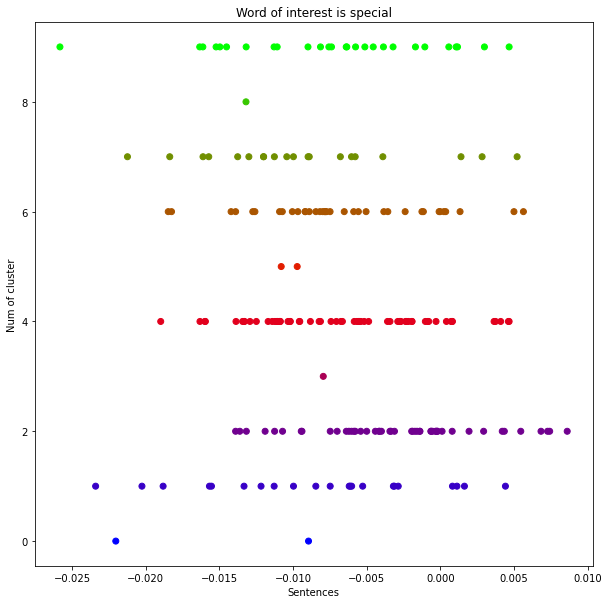


special's plot saved in output folder.


In [15]:
# Plot the cluster
import matplotlib.pyplot as plt
import numpy as np

title = word_of_interest
plt.figure(figsize=(10, 10))
# for elem in contextvectors[0]:
plt.scatter([np.mean(pt) for pt in contextvectors],
            [label for label in label_list],
            c=label_list,
            cmap='brg')

plt.title("Word of interest is " + title)
plt.xlabel("Sentences")
plt.ylabel("Num of cluster")
# saving plot in output folder
now = datetime.now().strftime(f"{title} - %d.%m.%Y-%H:%M:%S")  # dd/mm/YY-H:M:S
plt.savefig(path / f'{now}.png')
plt.show()
print(f"\n{title}'s plot saved in output folder.")

Cluster Interpretation

In [12]:
from nltk.corpus import wordnet as wn
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

def bag_of_word(sent):
    """Auxiliary function for the Lesk algorithm. Transforms the given sentence
    according to the bag of words approach, apply lemmatization, stop words
    and punctuation removal.
    Params:
        sent: sentence
    Returns:
        bag of words
    """

    stop_words = set(stopwords.words('english'))
    punctuation = {',', ';', '(', ')', '{', '}', ':', '?', '!'}
    # Returns the input word unchanged if it cannot be found in WordNet.
    wnl = nltk.WordNetLemmatizer()
    # Return a tokenized copy of text, using NLTK’s recommended word tokenizer (Treebank + PunkSentence)
    tokens = nltk.word_tokenize(sent)
    tokens = list(filter(lambda x: x not in stop_words and x not in punctuation, tokens))
    return set(wnl.lemmatize(t) for t in tokens)

def max_freq(word):
    
    synsets = wn.synsets(word)

    sense2freq = ""
    freq_max = 0

    for s in synsets:
    
        freq = 0
    
        for lemma in s.lemmas():
            freq+=lemma.count()
            if freq > freq_max:
                freq_max = freq
                sense2freq = s

    return sense2freq


def lesk(word, sentence):
    
    #inizializzazione
    max_overlap = 0; 
    #best_sense = wn.synsets(word)[0] 
    best_sense = max_freq(word)
    #context = sentence.split()
    
    #If I choose the bag of words approach
    context = bag_of_word(sentence)
    signature = []
    
    for ss in wn.synsets(word):
        
        signature += ss.definition().split()
        signature += ss.lemma_names()     

        overlap = set(signature).intersection(context)
        signature.clear()

        if len(overlap) > max_overlap:
            best_sense = ss
            max_overlap = len(overlap)
            
    return best_sense

In [13]:
from collections import Counter

sentences = []
synsets = []
for index, sent in enumerate(sentences_with_vectors):
        if label_list[index] == 3:
            sentences.append(" ".join(sent))
            
for i in sentences:
    synsets.append(lesk(word_of_interest,i))
    
D = Counter(synsets)
D

Counter({Synset('barroom.n.01'): 19,
         Synset('bar.n.03'): 3,
         Synset('bar.n.05'): 2})

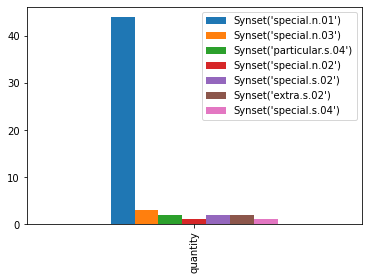

In [145]:
import pandas as pd
pd.DataFrame(D, index=['quantity']).plot(kind='bar')

Meccaniscmo a Pseudo-word

In [14]:
w1 = "bar"
w2 = "special"
sentences_of_interest = []
bar = []
special = []

for s in nltk.corpus.brown.sents():
    if (w1 in s):
        bar.append(s)
        
for s in nltk.corpus.brown.sents():
    if (w2 in s):
        special.append(s)

for s in nltk.corpus.brown.sents():
    if (w1 in s) or (w2 in s):
        sentences_of_interest.append(s)

for w in sentences_of_interest:
    if w1 in w:
        print("The first sentence with the word", w1, "is:", w)
        break
for w in sentences_of_interest:
    if w2 in w:
        print("The first sentence with the word", w2, "is:", w)
        break

The first sentence with the word bar is: ['Would', 'bar', 'vehicles']
The first sentence with the word special is: ['The', 'bill', 'is', 'designed', 'to', 'provide', 'special', 'schooling', 'for', 'more', 'deaf', 'students', 'in', 'the', 'scholastic', 'age', 'at', 'a', 'reduced', 'cost', 'to', 'the', 'state', '.']


In [15]:
len(sentences_of_interest)

294

In [16]:
len(bar)+len(special)

294

In [17]:
sentences_reformulated = []

for s in nltk.corpus.brown.sents():
    if (w1 in s) or (w2 in s):
        sentences_reformulated.append(s)

for w in sentences_reformulated:
    if w1 in w:
        print("The first sentence with the word", w1, "is:", w)
        break
for w in sentences_reformulated:
    if w2 in w:
        print("The first sentence with the word", w2, "is:", w)
        break

The first sentence with the word bar is: ['Would', 'bar', 'vehicles']
The first sentence with the word special is: ['The', 'bill', 'is', 'designed', 'to', 'provide', 'special', 'schooling', 'for', 'more', 'deaf', 'students', 'in', 'the', 'scholastic', 'age', 'at', 'a', 'reduced', 'cost', 'to', 'the', 'state', '.']


In [18]:
pseudo_word = w1+w2

for w in sentences_reformulated:
    for n, a in enumerate(w):
        if (a==w1) or (a==w2):
            w[n] = pseudo_word
            
for w in bar:
    for n, a in enumerate(w):
        if (a==w1):
            w[n] = pseudo_word
            
for w in special:
    for n, a in enumerate(w):
        if (a==w2):
            w[n] = pseudo_word

In [19]:
sentences_reformulated

[['The',
  'bill',
  'is',
  'designed',
  'to',
  'provide',
  'barspecial',
  'schooling',
  'for',
  'more',
  'deaf',
  'students',
  'in',
  'the',
  'scholastic',
  'age',
  'at',
  'a',
  'reduced',
  'cost',
  'to',
  'the',
  'state',
  '.'],
 ['The',
  'third',
  'amended',
  'the',
  'enabling',
  'act',
  'for',
  'creation',
  'of',
  'the',
  'Lamar',
  'county',
  'Hospital',
  'District',
  ',',
  'for',
  'which',
  'a',
  'barspecial',
  'constitutional',
  'amendment',
  'previously',
  'was',
  'adopted',
  '.'],
 ['Marshall',
  'Formby',
  'of',
  'Plainview',
  ',',
  'former',
  'chairman',
  'of',
  'the',
  'Texas',
  'Highway',
  'Commission',
  ',',
  'suggested',
  'a',
  'plan',
  'to',
  'fill',
  'by',
  'appointment',
  'future',
  'vacancies',
  'in',
  'the',
  'Legislature',
  'and',
  'Congress',
  ',',
  'eliminating',
  'the',
  'need',
  'for',
  'costly',
  'barspecial',
  'elections',
  '.'],
 ['Contempt',
  'proceedings',
  'originally',
  'had

In [20]:
bar

[['Would', 'barspecial', 'vehicles'],
 ['But',
  'the',
  'internationalists',
  'have',
  'taken',
  'over',
  'the',
  'governing',
  'body',
  'of',
  'the',
  'barspecial',
  ',',
  'and',
  'when',
  'the',
  'lads',
  'met',
  'in',
  'St.',
  'Louis',
  ',',
  'it',
  'was',
  'not',
  'to',
  'grumble',
  'about',
  'the',
  'humidity',
  'but',
  'to',
  'vote',
  'unanimously',
  'that',
  'the',
  'United',
  'Nations',
  'was',
  'scarcely',
  'less',
  'than',
  'wonderful',
  ',',
  'despite',
  'an',
  'imperfection',
  'here',
  'and',
  'there',
  '.'],
 ['Recognition',
  'of',
  'Prisoners',
  'Union',
  'rule',
  'that',
  'no',
  'member',
  'of',
  'an',
  'iron',
  'or',
  'steel',
  'workers',
  'union',
  'be',
  'permitted',
  'to',
  'repair',
  'a',
  'sawed-off',
  'barspecial',
  'without',
  'approval',
  'and',
  'participation',
  'of',
  'representative',
  'of',
  'the',
  'cell',
  'occupant',
  '.'],
 ['Susan',
  'Johnson',
  ',',
  'as',
  'the',
  

In [21]:
for w in sentences_reformulated:
    if pseudo_word in w:
        print("The first sentence with the word", pseudo_word, "is:", w)
        break

The first sentence with the word barspecial is: ['The', 'bill', 'is', 'designed', 'to', 'provide', 'barspecial', 'schooling', 'for', 'more', 'deaf', 'students', 'in', 'the', 'scholastic', 'age', 'at', 'a', 'reduced', 'cost', 'to', 'the', 'state', '.']


In [22]:
for w in sentences_of_interest:
    if pseudo_word in w:
        print("The first sentence with the word", pseudo_word, "is:", w)
        break

In [23]:
contextvectors = [ ]
sentences_with_vectors = [ ]
pseudo_word = w1+w2
for sent in sentences_reformulated:
    embedding = make_contextvector(sent, pseudo_word, space)
    if embedding is not None:
        sentences_with_vectors.append(sent)
        contextvectors.append( embedding )

print("We got embeddings for", len(contextvectors), "out of", len(sentences_reformulated), "contexts.")

We got embeddings for 288 out of 294 contexts.


In [24]:
from sklearn.cluster import KMeans

numclusters = 2
kmeans_obj = KMeans(n_clusters=numclusters)
kmeans_obj.fit(contextvectors)
label_list = kmeans_obj.labels_

# Let's print the sentences that got clustered together.
for clusternumber in range(numclusters):
    print("\n\n")
    print("Sentences in cluster", clusternumber)
    for index, sent in enumerate(sentences_with_vectors):
        if label_list[index] == clusternumber:
            print(" ".join(sent))




Sentences in cluster 0
The bill is designed to provide barspecial schooling for more deaf students in the scholastic age at a reduced cost to the state .
The third amended the enabling act for creation of the Lamar county Hospital District , for which a barspecial constitutional amendment previously was adopted .
Marshall Formby of Plainview , former chairman of the Texas Highway Commission , suggested a plan to fill by appointment future vacancies in the Legislature and Congress , eliminating the need for costly barspecial elections .
Contempt proceedings originally had been brought against 677 persons in 133 precincts by Morris J. Wexler , barspecial prosecutor .
The President , in a barspecial message to Congress , tied in with his aged care plan requests for large federal grants to finance medical and dental scholarships , build 20 new medical and 20 new dental schools , and expand child health care and general medical research .
Simultaneously the President announced Thursday t

In [27]:
c_bar = 0
c_special = 0
for index, sent in enumerate(sentences_with_vectors):
        if label_list[index] == 0:
            if sent in bar:
                c_bar += 1
            elif sent in special:
                c_special += 1
print("Claster 0 have " + str(c_bar) + " matching in bar and " + str(c_special) + " matching in special")

Claster 0 have 15 matching in bar and 167 matching in special


In [34]:
precision = round(c_special/(c_bar+c_special),2)
print("Precision: " + str(precision))
recall = round(c_special/len(special),2)
print("Recall: " + str(recall))
F1 = round(2*((precision*recall)/(precision+recall)),2)
print("F1 score: : " + str(F1))

Precision: 0.92
Recall: 0.74
F1 score: : 0.82


In [38]:
c_bar = 0
c_special = 0
for index, sent in enumerate(sentences_with_vectors):
        if label_list[index] == 1:
            if sent in bar:
                c_bar += 1
            elif sent in special:
                c_special += 1
print("Claster 1 have " + str(c_bar) + " matching in bar and " + str(c_special) + " matching in special")

Claster 1 have 53 matching in bar and 53 matching in special


In [39]:
precision = round(c_bar/(c_bar+c_special),2)
print("Precision: " + str(precision))
recall = round(c_bar/len(bar),2)
print("Recall: " + str(recall))
F1 = round(2*((precision*recall)/(precision+recall)),2)
print("F1 score: : " + str(F1))

Precision: 0.5
Recall: 0.77
F1 score: : 0.61


# Esercizio 1.5

In [136]:
import pandas as pd
import nltk
from itertools import chain
from collections import Counter
from nltk.corpus import wordnet as wn
from difflib import SequenceMatcher

In [20]:
def bag_of_word(sent):
    """Auxiliary function for the Lesk algorithm. Transforms the given sentence
    according to the bag of words approach, apply lemmatization, stop words
    and punctuation removal.
    Params:
        sent: sentence
    Returns:
        bag of words
    """

    stop_words = set(stopwords.words('english'))
    punctuation = {',', ';', '(', ')', '{', '}', ':', '?', '!'}
    # Returns the input word unchanged if it cannot be found in WordNet.
    wnl = nltk.WordNetLemmatizer()
    # Return a tokenized copy of text, using NLTK’s recommended word tokenizer (Treebank + PunkSentence)
    tokens = nltk.word_tokenize(sent)
    tokens = list(filter(lambda x: x not in stop_words and x not in punctuation, tokens))
    return list(set(wnl.lemmatize(t) for t in tokens))

In [3]:
df = pd.read_excel('tlndicaro_1.1_defs.xlsx').dropna()
df.head()

,Partecipante,Courage,Paper,Apprehension,Sharpener
1,2,Ability to face our own fears and do something...,Material derived from trees and used in sever...,fearful expectation or anticipation,Object used to shapen a pencil
2,3,the ability to face thing without fear,a type of material made from cellulose,A moode where one feel agitation,An object to sharpen a pencil
4,5,Inner strength thaht allow you to face particu...,Product obtained from wood cellulose. It is us...,State of disturbance,Tool used to sharpen pencils
5,6,Ability to control the fear,Flat material made from wood used for writing,Worry about the future,Little object which allow to sharpen a pencil
6,7,Ability to control fear and to be willing to d...,a short piece of writing on a particular subje...,"act of understanding something, or the way tha...",tool for making something sharper


In [6]:
courage = df['Courage']
paper = df['Paper']
apprehension = df['Apprehension']
sharpener = df['Sharpener']

In [370]:
#I verify the terms exist in WN and have associated synsets
term_list = ['courage','paper','apprehension','sharpener']

for term in term_list:
    print('Term: ' + str(term))
    for ss in wn.synsets(term):
        print(ss)
    print()

Term: courage
Synset('courage.n.01')

Term: paper
Synset('paper.n.01')
Synset('composition.n.08')
Synset('newspaper.n.01')
Synset('paper.n.04')
Synset('paper.n.05')
Synset('newspaper.n.02')
Synset('newspaper.n.03')
Synset('paper.v.01')
Synset('wallpaper.v.01')

Term: apprehension
Synset('apprehension.n.01')
Synset('understanding.n.01')
Synset('apprehension.n.03')
Synset('apprehension.n.04')

Term: sharpener
Synset('sharpener.n.01')



In [277]:
def words_extraction(sent):
    bag = []
    stop_words = set(stopwords.words('english'))
    punctuation = {',', ';', '(', ')', '{', '}', ':', '?', '!'}
    # Returns the input word unchanged if it cannot be found in WordNet.
    wnl = nltk.WordNetLemmatizer()
    # Return a tokenized copy of text, using NLTK’s recommended word tokenizer (Treebank + PunkSentence)
    tokens = nltk.word_tokenize(sent)
    for tok in tokens:
        if tok.lower() not in stop_words:
            if tok.lower() not in punctuation:
                bag.append(tok.lower())
    return list(bag)

In [278]:
words_extraction('Hi, my name is Roberto and I am here to implement this code')

['hi', 'name', 'roberto', 'implement', 'code']

In [279]:
B_courage = []
B_paper = []
B_apprehension = []
B_sharpener = []

for (a,b,c,d) in zip(courage,paper,apprehension,sharpener):
    B_courage.append(words_extraction(a.lower())[:3])
    B_paper.append(words_extraction(b.lower())[:3])
    B_apprehension.append(words_extraction(c.lower())[:3])
    B_sharpener.append(words_extraction(d.lower())[:3])
    
print(B_courage)

[['ability', 'face', 'fears'], ['ability', 'face', 'thing'], ['inner', 'strength', 'thaht'], ['ability', 'control', 'fear'], ['ability', 'control', 'fear'], ['ability', 'avoid', 'fear'], ['abiliity', 'make', 'choices'], ['able', 'something', 'fearful'], ['ability', 'something', 'despite'], ['ability', 'something', 'scares'], ['feeling', 'allows', 'us'], ['ability', 'something', 'may'], ['ability', 'make', 'drastic'], ['ability', 'overcome', 'fear'], ['characteristic', 'person', 'taking'], ['quality', 'able', 'things'], ['ability', 'face', 'difficult'], ['ability', 'something', 'people'], ['strength', 'mind', 'allows'], ['ability', 'face', 'one'], ['ability', 'blocked', 'fear'], ['emotion', 'allows', 'someone'], ['ability', 'perform', 'dangerous'], ['mental', 'moral', 'strength'], ['ability', 'resist', 'fear'], ['ability', 'overcome', 'fears'], ['ability', 'overcome', 'fear'], ['aptitude', 'human', 'makes']]


In [348]:
courage

1     Ability to face our own fears and do something...
2               the ability to face thing without fear 
4     Inner strength thaht allow you to face particu...
5                           Ability to control the fear
6     Ability to control fear and to be willing to d...
7     Ability to avoid fear and to take on risky act...
8     Abiliity to make choices and take action witho...
9                    Being able to do something fearful
10    the ability to do something despite being frig...
11    the ability to do something that scares most p...
13    Feeling that allows us to face situations cons...
14        the ability to do something that may be scary
15               is the ability to make drastic choices
16                             ability to overcome fear
17         characteristic of a person who taking a risk
18    the quality of being able to do things which a...
20                 Ability to face difficult situations
21             ability to do something most peop

In [280]:
B_courage = list(chain.from_iterable(B_courage))
B_paper = list(chain.from_iterable(B_paper))
B_apprehension = list(chain.from_iterable(B_apprehension))
B_sharpener = list(chain.from_iterable(B_sharpener))

In [281]:
print(B_courage)

['ability', 'face', 'fears', 'ability', 'face', 'thing', 'inner', 'strength', 'thaht', 'ability', 'control', 'fear', 'ability', 'control', 'fear', 'ability', 'avoid', 'fear', 'abiliity', 'make', 'choices', 'able', 'something', 'fearful', 'ability', 'something', 'despite', 'ability', 'something', 'scares', 'feeling', 'allows', 'us', 'ability', 'something', 'may', 'ability', 'make', 'drastic', 'ability', 'overcome', 'fear', 'characteristic', 'person', 'taking', 'quality', 'able', 'things', 'ability', 'face', 'difficult', 'ability', 'something', 'people', 'strength', 'mind', 'allows', 'ability', 'face', 'one', 'ability', 'blocked', 'fear', 'emotion', 'allows', 'someone', 'ability', 'perform', 'dangerous', 'mental', 'moral', 'strength', 'ability', 'resist', 'fear', 'ability', 'overcome', 'fears', 'ability', 'overcome', 'fear', 'aptitude', 'human', 'makes']


In [438]:
#numeber of words to extract
n = 4

In [439]:
sorted(Counter(B_paper).items(), key=lambda x: x[1], reverse=True)[:n]

[('material', 20), ('obtained', 5), ('wood', 5), ('trees', 4)]

In [440]:
Genus_Courage = []

for key, value in Counter(B_courage).items():
    if value in sorted(Counter(B_courage).values())[-n:]:
        Genus_Courage.append(key)
print(Genus_Courage)

['ability', 'face', 'fear', 'something']


In [441]:
Genus_Paper = []

for key, value in Counter(B_paper).items():
    if value in sorted(Counter(B_paper).values())[-n:]:
        Genus_Paper.append(key)
print(Genus_Paper)

['material', 'trees', 'made', 'obtained', 'wood', 'writing', 'write', 'used']


In [442]:
Genus_Apprehension = []

for key, value in Counter(B_apprehension).items():
    if value in sorted(Counter(B_apprehension).values())[-n:]:
        Genus_Apprehension.append(key)
print(Genus_Apprehension)

['state', 'something', 'anxiety', 'fear']


In [443]:
Genus_Sharpener = []

for key, value in Counter(B_sharpener).items():
    if value in sorted(Counter(B_sharpener).values())[-n:]:
        Genus_Sharpener.append(key)
print(Genus_Sharpener)

['object', 'used', 'sharpen', 'tool']


In [444]:
hypon_courage = []
for gen in Genus_Courage:
    for ss in wn.synsets(str(gen)):
        #print(f'genus.sense: {str(ss.name())}')
        for hypon in ss.hyponyms(): #trovo gli iponimi
            hypon_courage.append(hypon)
            #print(f'hypon: {str(hypon)}')
        #print()
print(hypon_courage)

[Synset('adaptability.n.01'), Synset('capability.n.01'), Synset('competence.n.01'), Synset('contractility.n.01'), Synset('form.n.14'), Synset('immunocompetence.n.01'), Synset('interoperability.n.01'), Synset('magical_ability.n.01'), Synset('midas_touch.n.01'), Synset('penetration.n.04'), Synset('physical_ability.n.01'), Synset('sensitivity.n.05'), Synset('totipotency.n.01'), Synset('aptitude.n.01'), Synset('bilingualism.n.01'), Synset('capacity.n.08'), Synset('creativity.n.01'), Synset('faculty.n.01'), Synset('hand.n.04'), Synset('intelligence.n.01'), Synset('know-how.n.01'), Synset('leadership.n.04'), Synset('originality.n.01'), Synset('skill.n.01'), Synset('skill.n.02'), Synset('superior_skill.n.01'), Synset('countenance.n.03'), Synset('leer.n.02'), Synset('sparkle.n.01'), Synset('beam-ends.n.01'), Synset('bottom.n.01'), Synset('front.n.01'), Synset('lee.n.08'), Synset('rear.n.02'), Synset('top.n.02'), Synset('windward.n.02'), Synset('muzzle.n.02'), Synset('clock_face.n.01'), Synset(

In [445]:
hypon_paper = []
for gen in Genus_Paper:
    for ss in wn.synsets(str(gen)):
        #print(f'genus.sense: {str(ss.name())}')
        for hypon in ss.hyponyms(): #trovo gli iponimi
            hypon_paper.append(hypon)
            #print(f'hypon: {str(hypon)}')
        #print()
print(hypon_paper)

[Synset('abrasive.n.01'), Synset('adhesive_material.n.01'), Synset('aggregate.n.02'), Synset('ammunition.n.02'), Synset('animal_material.n.01'), Synset('atom.n.02'), Synset('ballast.n.01'), Synset('bedding_material.n.01'), Synset('bimetal.n.01'), Synset('builder.n.01'), Synset('chemical.n.01'), Synset('coloring_material.n.01'), Synset('composite_material.n.01'), Synset('conductor.n.02'), Synset('contaminant.n.01'), Synset('detritus.n.02'), Synset('diamagnet.n.01'), Synset('discharge.n.03'), Synset('dust.n.03'), Synset('earth.n.02'), Synset('elastomer.n.01'), Synset('fiber.n.01'), Synset('filling.n.01'), Synset('floccule.n.01'), Synset('fluff.n.01'), Synset('foam.n.02'), Synset('hazmat.n.01'), Synset('homogenate.n.01'), Synset('humate.n.01'), Synset('impregnation.n.01'), Synset('insulator.n.01'), Synset('mineral.n.01'), Synset('packing_material.n.01'), Synset('paper.n.01'), Synset('particulate.n.01'), Synset('plant_material.n.01'), Synset('precursor.n.01'), Synset('radioactive_material.

In [446]:
hypon_apprehension = []
for gen in Genus_Apprehension:
    for ss in wn.synsets(str(gen)):
        #print(f'genus.sense: {str(ss.name())}')
        for hypon in ss.hyponyms(): #trovo gli iponimi
            hypon_apprehension.append(hypon)
            #print(f'hypon: {str(hypon)}')
        #print()
print(hypon_apprehension)

[Synset('american_state.n.01'), Synset('australian_state.n.01'), Synset('canadian_province.n.01'), Synset('commonwealth.n.01'), Synset('eparchy.n.01'), Synset('italian_region.n.01'), Synset('soviet_socialist_republic.n.01'), Synset('action.n.02'), Synset('being.n.01'), Synset('cleavage.n.01'), Synset('condition.n.01'), Synset('condition.n.03'), Synset('conditionality.n.01'), Synset('conflict.n.04'), Synset('damnation.n.02'), Synset('dead_letter.n.01'), Synset('death.n.03'), Synset('degree.n.02'), Synset('dependence.n.01'), Synset('disorder.n.03'), Synset('dystopia.n.01'), Synset('employment.n.01'), Synset('end.n.06'), Synset('enlargement.n.02'), Synset('feeling.n.01'), Synset('flux.n.05'), Synset('freedom.n.01'), Synset('grace.n.01'), Synset('ground_state.n.01'), Synset('heterozygosity.n.01'), Synset('homozygosity.n.01'), Synset('hostility.n.02'), Synset('illumination.n.02'), Synset('immaturity.n.01'), Synset('imminence.n.01'), Synset('imperfection.n.01'), Synset('inaction.n.01'), Syns

In [447]:
hypon_sharpener = []
for gen in Genus_Sharpener:
    for ss in wn.synsets(str(gen)):
        #print(f'genus.sense: {str(ss.name())}')
        for hypon in ss.hyponyms(): #trovo gli iponimi
            hypon_sharpener.append(hypon)
            #print(f'hypon: {str(hypon)}')
        #print()
print(hypon_sharpener)

[Synset('catch.n.04'), Synset('charm.n.03'), Synset('commemorative.n.01'), Synset('curio.n.01'), Synset('discard.n.01'), Synset('draw.n.04'), Synset('film.n.04'), Synset('finding.n.03'), Synset('floater.n.07'), Synset('fomite.n.01'), Synset('geological_formation.n.01'), Synset('growth.n.07'), Synset('hail.n.02'), Synset('head.n.17'), Synset('hoodoo.n.04'), Synset('ice.n.02'), Synset('je_ne_sais_quoi.n.01'), Synset('keepsake.n.01'), Synset('land.n.02'), Synset('land.n.04'), Synset('location.n.01'), Synset('makeweight.n.01'), Synset('moon.n.02'), Synset('neighbor.n.02'), Synset('paring.n.02'), Synset('part.n.02'), Synset('property.n.05'), Synset('remains.n.01'), Synset('ribbon.n.01'), Synset('shiner.n.02'), Synset('snake.n.05'), Synset('stuff.n.02'), Synset('triviality.n.03'), Synset('vagabond.n.01'), Synset('wall.n.02'), Synset('web.n.01'), Synset('whole.n.02'), Synset('business.n.05'), Synset('grail.n.01'), Synset('point.n.07'), Synset('thing.n.10'), Synset('direct_object.n.01'), Synse

In [448]:
#I check the correct synset is in the list of hyponims


print('Term: courage')
for ss in wn.synsets('courage'):
    if ss in hypon_courage:
        print(str(ss) + ' True')
    else:
        print(str(ss) + ' False')
print()
        
print('Term: paper')
for ss in wn.synsets('paper'):
    if ss in hypon_paper:
        print(str(ss) + ' True')
    else:
        print(str(ss) + ' False')
print()

print('Term: apprehension')
for ss in wn.synsets('apprehension'):
    if ss in hypon_apprehension:
        print(str(ss) + ' True')
    else:
        print(str(ss) + ' False')
print()

print('Term: sharpener')
for ss in wn.synsets('sharpener'):
    if ss in hypon_sharpener:
        print(str(ss) + ' True')
    else:
        print(str(ss) + ' False')
print()

Term: courage
Synset('courage.n.01') False

Term: paper
Synset('paper.n.01') True
Synset('composition.n.08') False
Synset('newspaper.n.01') False
Synset('paper.n.04') False
Synset('paper.n.05') False
Synset('newspaper.n.02') False
Synset('newspaper.n.03') False
Synset('paper.v.01') False
Synset('wallpaper.v.01') False

Term: apprehension
Synset('apprehension.n.01') True
Synset('understanding.n.01') False
Synset('apprehension.n.03') False
Synset('apprehension.n.04') False

Term: sharpener
Synset('sharpener.n.01') False



In [449]:
def infer_simil(def1, def2):
    bow_a = list(words_extraction(def1.lower()))[:n]
    bow_b = list(words_extraction(def2.lower()))[:n]
    #B_courage.append(bag_of_word(a.lower())[:3])
    #print(bow_a)
    #print(bow_b)
    result = evaluate_performance(bow_a, bow_b)
    return result

In [450]:
infer_simil('The ability to do something very hard and constancy', 
            'The capacity to do something quite hard and with constance')

0.5

In [451]:
lex = []
max_sym = 0
my_synset = ''
example = ''
max_list = []

for hyp in hypon_courage:
    
    #Here I extract fenition
    example = ''
    lex = []
    defin = hyp.definition()
    lex.append(defin)
    #print('definition: ' + str(defin))
    for ex in hyp.examples():
        example = ex
        lex.append(ex)
        #print('example: ' + str(ex))  
    #print(lex_courage)
    #print()
    
    for my_def in courage:
        for wn_def in lex:
            #my_sym = similar(my_def, wn_def)
            #my_sym = my_similarity(my_def, wn_def)
            my_sym = infer_simil(my_def, wn_def)
            if my_sym > max_sym:
                max_list.append([max_sym, hyp])
                max_sym = my_sym
                my_synset = hyp
print('max_sym is: ' + str(max_sym))
print('my wn synset inferred for COURAGE is: ' + str(my_synset))
print(max_list)

max_sym is: 0.75
my wn synset inferred for COURAGE is: Synset('physical_ability.n.01')
[[0, Synset('adaptability.n.01')], [0.25, Synset('adaptability.n.01')], [0.2857142857142857, Synset('form.n.14')], [0.3333333333333333, Synset('form.n.14')], [0.5714285714285714, Synset('physical_ability.n.01')]]


In [454]:
lex = []
max_sym = 0
my_synset = ''
example = ''
max_list = []

for hyp in hypon_paper:
    
    #Here I extract fenition
    example = ''
    lex = []
    defin = hyp.definition()
    lex.append(defin)
    #print('definition: ' + str(defin))
    for ex in hyp.examples():
        example = ex
        lex.append(ex)
        #print('example: ' + str(ex))  
    #print(lex_courage)
    #print()
    
    for my_def in paper:
        for wn_def in lex:
            #my_sym = similar(my_def, wn_def)
            #my_sym = my_similarity(my_def, wn_def)
            my_sym = infer_simil(my_def, wn_def)
            if my_sym > max_sym:
                max_list.append([max_sym, hyp])
                max_sym = my_sym
                my_synset = hyp
print('max_sym is: ' + str(max_sym))
print('my wn synset inferred for PAPER is: ' + str(my_synset))
print(max_list)

max_sym is: 0.75
my wn synset inferred for PAPER is: Synset('paper.n.01')
[[0, Synset('aggregate.n.02')], [0.5, Synset('aggregate.n.02')], [0.5714285714285714, Synset('coloring_material.n.01')], [0.6666666666666666, Synset('paper.n.01')]]


In [455]:
lex = []
max_sym = 0
my_synset = ''
example = ''
max_list = []

for hyp in hypon_apprehension:
    
    #Here I extract fenition
    example = ''
    lex = []
    defin = hyp.definition()
    lex.append(defin)
    #print('definition: ' + str(defin))
    for ex in hyp.examples():
        example = ex
        lex.append(ex)
        #print('example: ' + str(ex))  
    #print(lex_courage)
    #print()
    
    for my_def in apprehension:
        for wn_def in lex:
            #my_sym = similar(my_def, wn_def)
            #my_sym = my_similarity(my_def, wn_def)
            my_sym = infer_simil(my_def, wn_def)
            if my_sym > max_sym:
                max_list.append([max_sym, hyp])
                max_sym = my_sym
                my_synset = hyp
print('max_sym is: ' + str(max_sym))
print('my wn synset inferred for APPREHENSION is: ' + str(my_synset))
print(max_list)

max_sym is: 1.0
my wn synset inferred for APPREHENSION is: Synset('apprehension.n.01')
[[0, Synset('american_state.n.01')], [0.25, Synset('action.n.02')], [0.5, Synset('condition.n.01')], [0.5714285714285714, Synset('nonbeing.n.01')], [0.6666666666666666, Synset('apprehension.n.01')]]


In [456]:
lex = []
max_sym = 0
my_synset = ''
example = ''
max_list = []

for hyp in hypon_sharpener:
    
    #Here I extract fenition
    example = ''
    lex = []
    defin = hyp.definition()
    lex.append(defin)
    #print('definition: ' + str(defin))
    for ex in hyp.examples():
        example = ex
        lex.append(ex)
        #print('example: ' + str(ex))  
    #print(lex_courage)
    #print()
    
    for my_def in sharpener:
        for wn_def in lex:
            #my_sym = similar(my_def, wn_def)
            #my_sym = my_similarity(my_def, wn_def)
            my_sym = infer_simil(my_def, wn_def)
            if my_sym > max_sym:
                max_list.append([max_sym, hyp])
                max_sym = my_sym
                my_synset = hyp
print('max_sym is: ' + str(max_sym))
print('my wn synset inferred for SHARPENER is: ' + str(my_synset))
print(max_list)

max_sym is: 0.5
my wn synset inferred for SHARPENER is: Synset('acuminate.v.01')
[[0, Synset('charm.n.03')], [0.25, Synset('commemorative.n.01')], [0.2857142857142857, Synset('finding.n.03')], [0.3333333333333333, Synset('point.n.07')], [0.4, Synset('acuminate.v.01')]]
